In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('../data/Attrition.csv')

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df_cleaned = df.copy()

df_cleaned['Over18'] = 1
df_cleaned['OverTime'] = df_cleaned['OverTime'].map({'Yes':1,'No':0})
df_cleaned['Attrition'] = df_cleaned['Attrition'].map({'Yes':1,'No':0})


In [6]:
df_cleaned = pd.get_dummies(
    df_cleaned,
    columns=[
        'BusinessTravel','Department','EducationField',
        'JobRole','MaritalStatus','Gender'
    ],
    drop_first=True
)


In [7]:
scaler = StandardScaler()

num_cols = [
    'HourlyRate','EmployeeNumber','MonthlyIncome',
    'TotalWorkingYears','YearsAtCompany',
    'YearsInCurrentRole','YearsSinceLastPromotion',
    'YearsWithCurrManager','DailyRate','MonthlyRate'
]

df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])
  

In [8]:
selected_features = [
    'Age','DailyRate','DistanceFromHome','Education',
    'EnvironmentSatisfaction','HourlyRate','JobInvolvement',
    'JobLevel','JobSatisfaction','MonthlyIncome',
    'NumCompaniesWorked','PercentSalaryHike',
    'RelationshipSatisfaction','WorkLifeBalance',
    'YearsAtCompany','YearsInCurrentRole',
    'YearsSinceLastPromotion','YearsWithCurrManager'
]

correlation = {
    feature: pearsonr(
        df_cleaned[feature].astype(float),
        df_cleaned['Attrition']
    )[0]
    for feature in selected_features
}

correlation_df = (
    pd.DataFrame(list(correlation.items()),
    columns=['Feature','Pearson Correlation'])
    .sort_values(by='Pearson Correlation')
)

correlation_df


,Feature,Pearson Correlation
7,JobLevel,-0.169105
15,YearsInCurrentRole,-0.160545
9,MonthlyIncome,-0.159840
0,Age,-0.159205
17,YearsWithCurrManager,-0.156199
14,YearsAtCompany,-0.134392
6,JobInvolvement,-0.130016
8,JobSatisfaction,-0.103481
4,EnvironmentSatisfaction,-0.103369
13,WorkLifeBalance,-0.063939


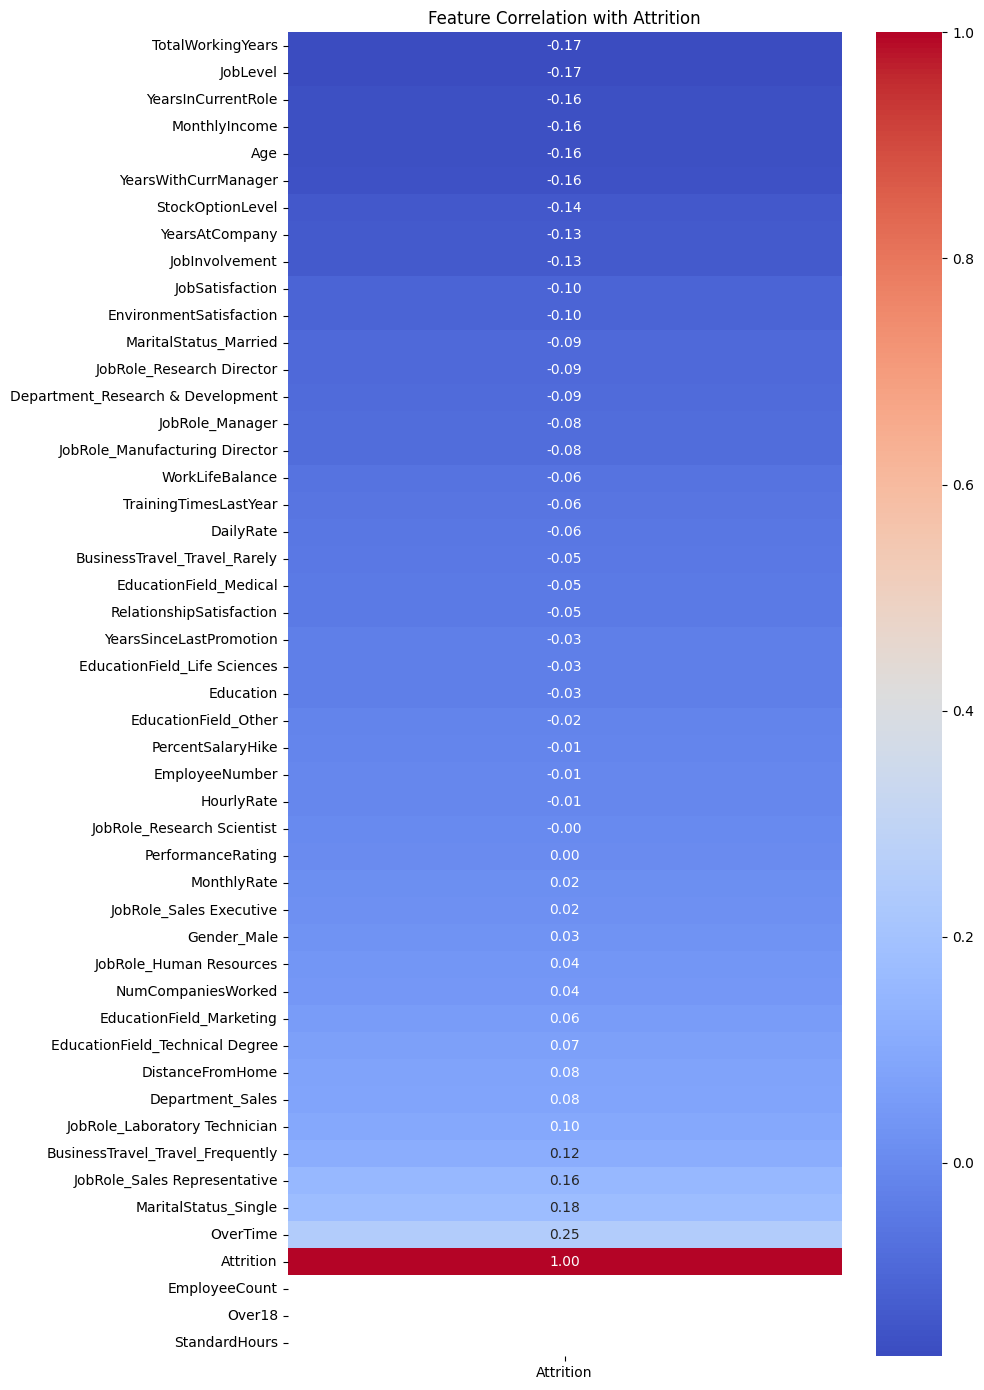

In [10]:
corr_with_attrition = (
    df_cleaned
    .corr(numeric_only=True)['Attrition']
    .sort_values()
)

plt.figure(figsize=(10,14))
sns.heatmap(
    corr_with_attrition.to_frame(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

plt.title("Feature Correlation with Attrition")
plt.tight_layout()
plt.savefig('../images/correlation_heatmap.png', dpi=300)
plt.show()



In [ ]:
df_cleaned.to_csv('../data/attrition_cleaned.csv', index=False)
